In [1]:
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996

In [2]:
import sys, os
sys.path.insert(0,os.pardir)
from tests.generate_test_data import generate_fakeTAC_SRTM

In [3]:
import numpy as np
np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline

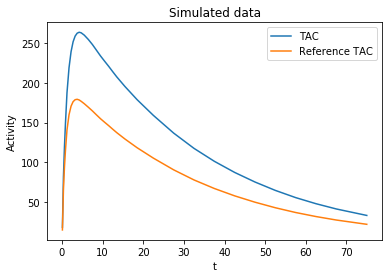

In [4]:
# generate noiseless fake data based on SRTM
BP = 0.5
R1 = 1.2
t, dt, TAC, refTAC = generate_fakeTAC_SRTM(BP, R1)

fig, ax = plt.subplots();
ax.plot(t, TAC, label='TAC');
ax.plot(t, refTAC, label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

In [5]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC, time_unit='min')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.49424241]),
 'R1': array([ 1.37144153]),
 'akaike': array([ 200.49477371]),
 'err': array([ 0.7036541]),
 'fpe': array([ 725.00102005]),
 'k2': array([ 0.48673687]),
 'logl': array([-96.24738685]),
 'mse': array([ 19.07897421])}

In [6]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC, time_unit='min')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519]),
 'R1': array([ 1.21159295]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 1.16059185]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.7736839]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([ 0.00020378]),
 'noiseVar_eqR1': array([ 0.00012201])}

In [7]:
# Generate noisy simulations by adding normal noise -- I don't think this is a good way
pct_noise = np.array([0, 5, 10, 15, 20, 25, 30])

TAC_matrix = TAC + np.random.normal(0,np.outer(TAC,pct_noise/100).T)

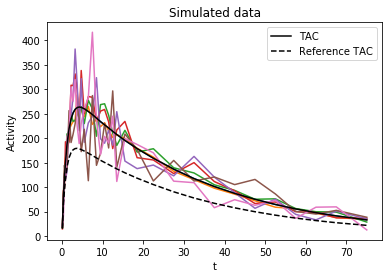

In [8]:
fig, ax = plt.subplots();
ax.plot(t, TAC_matrix.T, label='');
ax.plot(t, TAC, 'k-', label='TAC');
ax.plot(t, refTAC, 'k--', label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

Experiment using noisy TAC and noiseless reference TAC

In [9]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC_matrix, refTAC, time_unit='min')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.49424241,  0.47519372,  0.55660364,  0.595188  ,  0.5036484 ,
         0.55481882,  0.52047177]),
 'R1': array([ 1.37144153,  1.34119588,  1.28829097,  1.59837418,  1.43297265,
         1.16301822,  1.61345946]),
 'akaike': array([ 200.49477371,  253.63358586,  294.91916903,  331.30009014,
         356.85903569,  353.6600361 ,  365.56831684]),
 'err': array([ 0.7036541 ,  1.53747016,  2.8215341 ,  4.81765043,  7.01576099,
         6.69333801,  7.97320186]),
 'fpe': array([   725.00102005,   3461.25474903,  11657.10698663,  33985.27160859,
         72072.52656818,  65600.27966732,  93086.28423898]),
 'k2': array([ 0.48673687,  0.39345385,  0.36525971,  7.99999988,  0.03232803,
         0.07022063,  1.7592832 ]),
 'logl': array([ -96.24738685, -122.81679293, -143.45958452, -161.65004507,
        -174.42951784, -172.83001805, -178.78415842]),
 'mse': array([   19.07897421,    91.08565129,   306.76597333,   894.34925286,
         1896.645436  ,  1726.32314914,  2449.639058

In [10]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC_matrix, refTAC, time_unit='min')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519,  0.47445036,  0.55790968,  0.5702964 ,  0.48089571,
         0.47599935,  0.41665198]),
 'R1': array([ 1.21159295,  1.45038812,  1.28828813,  1.58901868,  1.43550319,
         1.17206718,  1.53922308]),
 'R1_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2': array([ 1.16059185,  0.06528311,  0.36902009,  0.00744475,  0.02431207,
         0.06465781,  0.05092178]),
 'k2_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2a': array([ 0.7736839 ,  0.04413523,  0.23651312,  0.0049335 ,  0.01597015,
         0.04139514,  0.03712914]),
 'k2a_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'noiseVar_eqDVR': array([  2.03777753e-04,   9.43811448e+00,   2.07797804e+01,
          5.43963242e+01,   2.51050127e+02,   1.12995920e+03,
          2.51227943e+02]),
 'noiseVar_eqR1': array([  1.22013775e-04,   1.32661054e+00,   4.34433891e+00,
          1.01164095e+01,   2.39577343e+01,   2.54567223e+01,
          2.93508122e+01])}

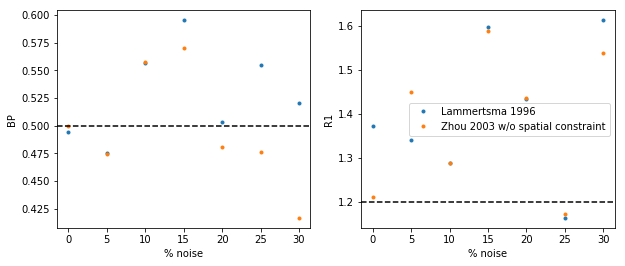

In [11]:
fig, axes = plt.subplots(1,2, figsize=(10,4));

axes[0].plot(pct_noise, mdl_lammertsma.results['BP'], '.', label='Lammertsma 1996');
axes[0].plot(pct_noise, mdl_zhou.results['BP'], '.', label='Zhou 2003 w/o spatial constraint');
axes[0].axhline(y=BP, color='k', linestyle='--');
axes[0].set_xlabel('% noise');
axes[0].set_ylabel('BP');
#axes[0].legend();

axes[1].plot(pct_noise, mdl_lammertsma.results['R1'], '.', label='Lammertsma 1996');
axes[1].plot(pct_noise, mdl_zhou.results['R1'], '.', label='Zhou 2003 w/o spatial constraint');
axes[1].axhline(y=R1, color='k', linestyle='--');
axes[1].set_xlabel('% noise');
axes[1].set_ylabel('R1');
axes[1].legend();